In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from skopt.space import Real, Categorical, Integer
import os

In [3]:
df = pd.read_csv("../data/Train.csv")
df_test = pd.read_csv("../data/Test.csv")
resultdf = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'precision', 'F1-score'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [5]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


In [6]:
df.drop_duplicates(inplace=True)
df.shape

(20000, 41)

In [7]:
print(df.isnull().sum())


V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64


In [8]:
columns_to_fill_mean = ["V1","V2"]
df[columns_to_fill_mean] =  df[columns_to_fill_mean].fillna(method='bfill')
df_test[columns_to_fill_mean] =  df_test[columns_to_fill_mean].fillna(method='bfill')


In [9]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')


In [10]:
print(df_test.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')


In [11]:
print(df.isnull().sum())


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64


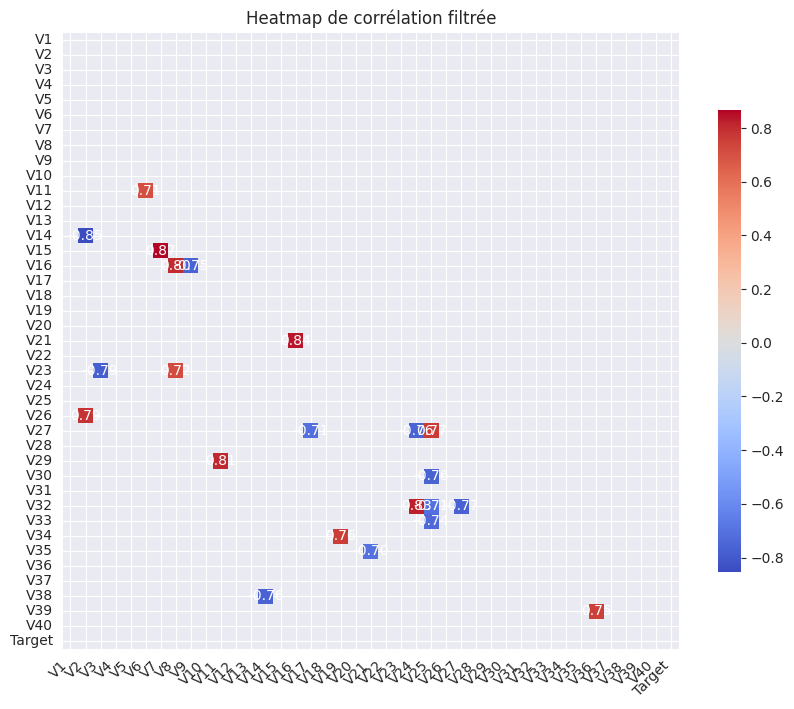

In [12]:
def show_correlation_matrix(dataframe, threshold=0.7):
    num_df = dataframe.select_dtypes(include=[np.number])
    corr = num_df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) | (np.abs(corr) < threshold)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=corr.columns, yticklabels=corr.columns,
                cbar_kws={"shrink": .75}, square=True)
    
    plt.xticks(rotation=45, ha='right')
    plt.title('Heatmap de corrélation filtrée')
    plt.show()

show_correlation_matrix(df)

In [13]:
#df.drop(columns=["V26","V16","V38","V39"], inplace=True)
#df_test.drop(columns=["V26","V16","V38","V39"], inplace=True)


In [14]:
def creer_histogrammes_boxplots(df):
    n_cols = df.shape[1]
    n_rows = n_cols * 2
    
    fig, axs = plt.subplots(n_rows, 1, figsize=(10, n_rows * 2))
    
    for i, col in enumerate(df.columns):
        ax_hist = axs[2*i]
        ax_box = axs[2*i + 1]
        
        ax_box.boxplot(df[col].dropna(), vert=False, patch_artist=True)
        ax_box.set_title(f'Box plot de {col}')
        ax_box.set_xlabel(col)
    
        ax_hist.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        ax_hist.set_title(f'Distribution de {col}')
        ax_hist.set_ylabel('Fréquence')
        
    plt.tight_layout()
    plt.show()


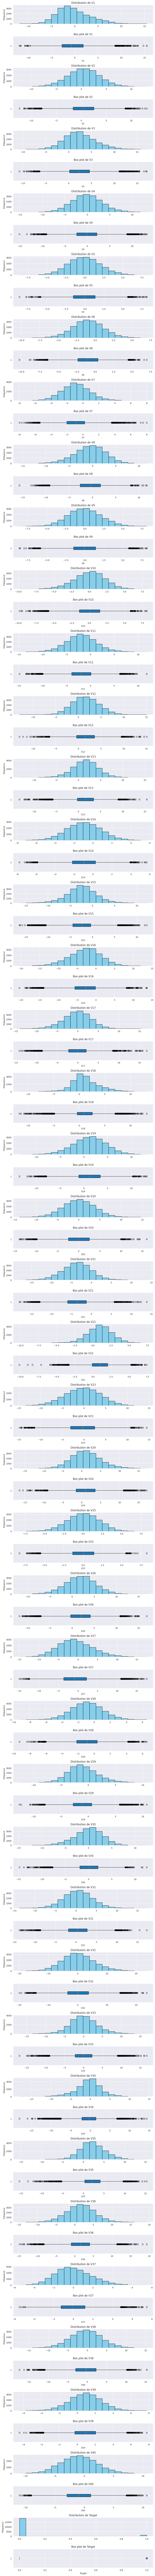

In [15]:
creer_histogrammes_boxplots(df)

Les colonnes ont l'air proche d'une loi guaussienne

In [16]:
compt1 = 0

for el in df_test["Target"]:
    if(el == 1):
        compt1 += 1
        
print(f"{compt1*100/df_test.shape[0]} %")

5.64 %


In [17]:
compt1 = 0

for el in df["Target"]:
    if(el == 1):
        compt1 += 1
        
print(f"{compt1*100/df.shape[0]} %")

5.55 %


In [18]:
def split_data(df1, df2):


    train_data = df1
    test_data = df2

    X_train = train_data.drop(['Target'], axis=1)
    y_train = train_data[['Target']].squeeze()

    X_test = test_data.drop(['Target'], axis=1)
    y_test = test_data[['Target']].squeeze()

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df, df_test)

In [19]:
def evaluate_classification_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)

    y_test_1d = y_test.squeeze()  

    metrics = {
        'Accuracy': accuracy_score(y_test_1d, predictions),
        'Recall': recall_score(y_test_1d, predictions),
        'Precision': precision_score(y_test_1d, predictions),
        'F1-score': f1_score(y_test_1d, predictions)
    }

    return metrics


def save_results_to_csv(model_name, metrics, filepath='model_classification_results.csv'):
    data = {'Model': model_name, **metrics}

    zinzibar = f"{data} sans sampling"

    df_new = pd.DataFrame([zinzibar])

    if os.path.exists(filepath) and os.path.getsize(filepath) > 0:
        try:
            df_old = pd.read_csv(filepath)
            df_result = pd.concat([df_old, df_new], ignore_index=True)
        except pd.errors.EmptyDataError:
            df_result = df_new
    else:
        df_result = df_new

    df_result.to_csv(filepath, index=False)
    print(f"Results for {model_name} saved to {filepath}")


In [20]:

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('SVM', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier()),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='auc')),
    ('LightGBM', LGBMClassifier(silent=True)),
    ('Extra Trees', ExtraTreesClassifier())
]


In [21]:
for model_name, model in models:
    model.fit(X_train, y_train)
    metrics = evaluate_classification_model(model, X_test, y_test)
    print(f"Results for {model_name}: {metrics}")
    new_row = pd.DataFrame([{'Model': model_name, 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
    resultdf = pd.concat([resultdf, new_row], ignore_index=True)
    

Results for Logistic Regression: {'Accuracy': 0.965, 'Recall': 0.4645390070921986, 'Precision': 0.8451612903225807, 'F1-score': 0.5995423340961098}
Results for Random Forest: {'Accuracy': 0.9836, 'Recall': 0.7198581560283688, 'Precision': 0.9854368932038835, 'F1-score': 0.8319672131147541}
Results for SVM: {'Accuracy': 0.9896, 'Recall': 0.8226950354609929, 'Precision': 0.9914529914529915, 'F1-score': 0.8992248062015504}
Results for K-Nearest Neighbors: {'Accuracy': 0.987, 'Recall': 0.7836879432624113, 'Precision': 0.9822222222222222, 'F1-score': 0.8717948717948719}
Results for Naive Bayes: {'Accuracy': 0.9132, 'Recall': 0.723404255319149, 'Precision': 0.36428571428571427, 'F1-score': 0.4845605700712589}
Results for AdaBoost: {'Accuracy': 0.971, 'Recall': 0.5815602836879432, 'Precision': 0.8586387434554974, 'F1-score': 0.693446088794926}
Results for CatBoost: {'Accuracy': 0.9892, 'Recall': 0.8226950354609929, 'Precision': 0.9830508474576272, 'F1-score': 0.8957528957528957}
Results for X

In [22]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
reneData = pd.concat([X_train_resampled, y_train_resampled], axis=1)

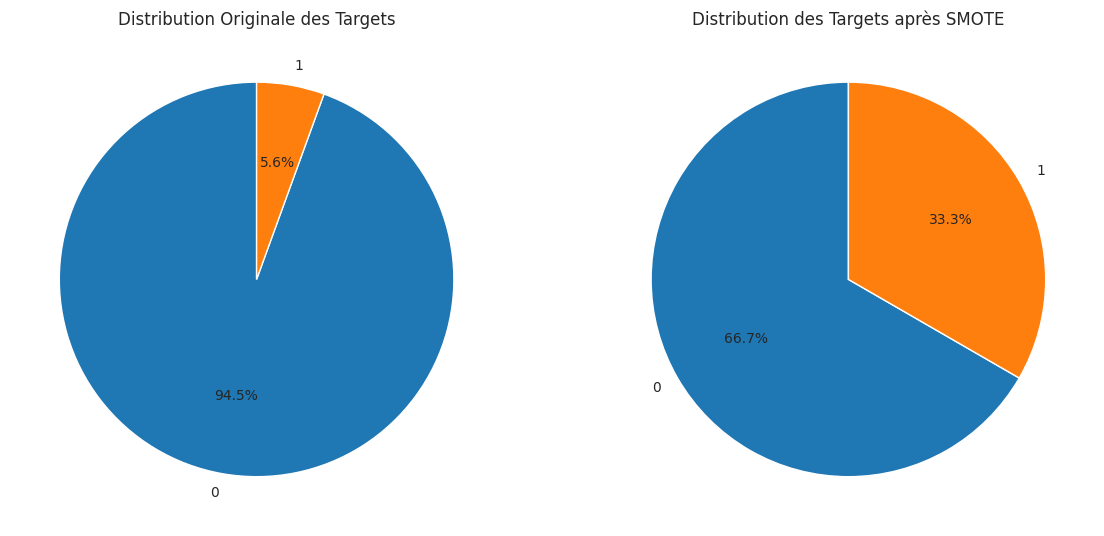

In [23]:

def plot_target_distribution(y_train, y_train_resampled):

    original_distribution = y_train.value_counts(normalize=True)
    resampled_distribution = y_train_resampled.value_counts(normalize=True)
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    axs[0].pie(original_distribution, labels=original_distribution.index, autopct='%1.1f%%', startangle=90)
    axs[0].set_title('Distribution Originale des Targets')
    
    axs[1].pie(resampled_distribution, labels=resampled_distribution.index, autopct='%1.1f%%', startangle=90)
    axs[1].set_title('Distribution des Targets après SMOTE')
    
    plt.show()

plot_target_distribution(y_train, y_train_resampled)

In [24]:
for model_name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    metrics = evaluate_classification_model(model, X_test, y_test)
    model_name = f"{model_name} avec SMOTE 0.5"
    print(f"Results for {model_name}: {metrics}")
    new_row = pd.DataFrame([{'Model': model_name, 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
    resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for Logistic Regression avec SMOTE 0.5: {'Accuracy': 0.9326, 'Recall': 0.7553191489361702, 'Precision': 0.44282744282744285, 'F1-score': 0.5583224115334208}
Results for Random Forest avec SMOTE 0.5: {'Accuracy': 0.9882, 'Recall': 0.8297872340425532, 'Precision': 0.9551020408163265, 'F1-score': 0.8880455407969639}
Results for SVM avec SMOTE 0.5: {'Accuracy': 0.989, 'Recall': 0.8687943262411347, 'Precision': 0.9315589353612167, 'F1-score': 0.8990825688073395}
Results for K-Nearest Neighbors avec SMOTE 0.5: {'Accuracy': 0.9704, 'Recall': 0.8439716312056738, 'Precision': 0.695906432748538, 'F1-score': 0.7628205128205128}
Results for Naive Bayes avec SMOTE 0.5: {'Accuracy': 0.8782, 'Recall': 0.7872340425531915, 'Precision': 0.28793774319066145, 'F1-score': 0.4216524216524216}
Results for AdaBoost avec SMOTE 0.5: {'Accuracy': 0.946, 'Recall': 0.776595744680851, 'Precision': 0.5140845070422535, 'F1-score': 0.6186440677966101}
Results for CatBoost avec SMOTE 0.5: {'Accuracy': 0.988, 'R

In [25]:

mod = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]

voting_classifier = VotingClassifier(estimators=mod, voting='soft', weights=[1, 2])
voting_classifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(voting_classifier, X_test, y_test)
print(f"Results for votingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model': "Voting Classifier avec SMOTE 0.5", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)


Results for votingClassifier: {'Accuracy': 0.9798, 'Recall': 0.8475177304964538, 'Precision': 0.8047138047138047, 'F1-score': 0.8255613126079447}


In [26]:
mod = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]
stackingClassifier = StackingClassifier(
            estimators=mod,
            final_estimator=KNeighborsClassifier()
        )
stackingClassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(stackingClassifier, X_test, y_test)
print(f"Results for stackingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model': "Stacking Classifier avec SMOTE 0.5", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)


Results for stackingClassifier: {'Accuracy': 0.9808, 'Recall': 0.8226950354609929, 'Precision': 0.8345323741007195, 'F1-score': 0.8285714285714286}


In [27]:

base_estimator = RandomForestClassifier(n_estimators=100)

bgclassifier = BaggingClassifier(estimator=base_estimator, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(bgclassifier, X_test, y_test)
print(f"Results for BaggingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model':"Bagging Classifier RandomForest avec SMOTE 0.5", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for BaggingClassifier: {'Accuracy': 0.9552, 'Recall': 0.6914893617021277, 'Precision': 0.5873493975903614, 'F1-score': 0.6351791530944625}


In [28]:
base_estimator = KNeighborsClassifier()

bgclassifier = BaggingClassifier(estimator=base_estimator, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(bgclassifier, X_test, y_test)
print(f"Results for BaggingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model':"Bagging Classifier KNeighbors avec SMOTE 0.5", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for BaggingClassifier: {'Accuracy': 0.9668, 'Recall': 0.648936170212766, 'Precision': 0.732, 'F1-score': 0.6879699248120301}


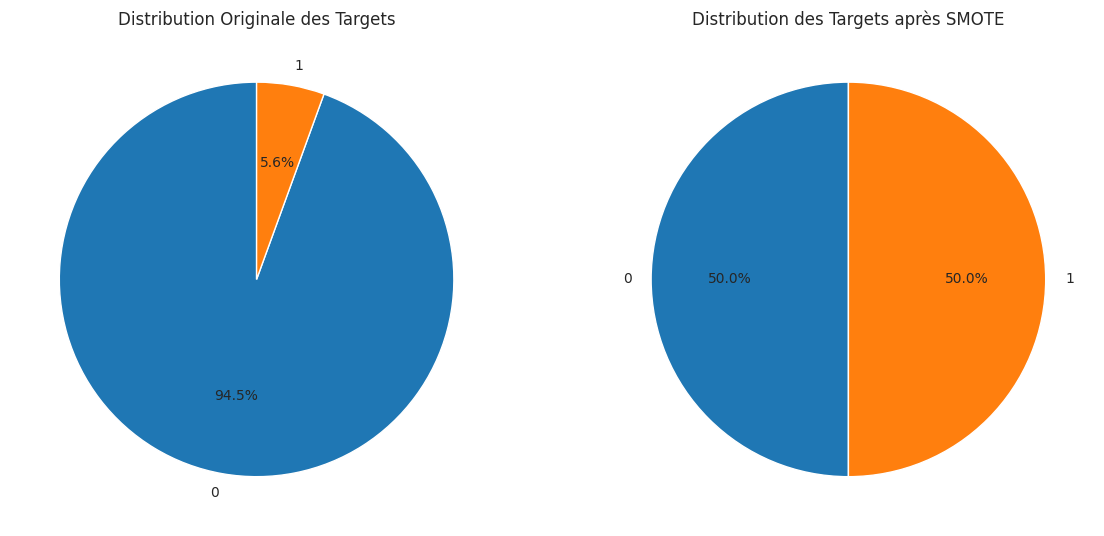

In [29]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
reneData = pd.concat([X_train_resampled, y_train_resampled], axis=1)

plot_target_distribution(y_train, y_train_resampled)


In [30]:
for model_name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    metrics = evaluate_classification_model(model, X_test, y_test)
    model_name = f"{model_name} avec SMOTE auto"
    print(f"Results for {model_name}: {metrics}")
    new_row = pd.DataFrame([{'Model': model_name, 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
    resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for Logistic Regression avec SMOTE auto: {'Accuracy': 0.877, 'Recall': 0.8085106382978723, 'Precision': 0.2889733840304182, 'F1-score': 0.4257703081232493}
Results for Random Forest avec SMOTE auto: {'Accuracy': 0.988, 'Recall': 0.8404255319148937, 'Precision': 0.9404761904761905, 'F1-score': 0.8876404494382023}
Results for SVM avec SMOTE auto: {'Accuracy': 0.9866, 'Recall': 0.8652482269503546, 'Precision': 0.8937728937728938, 'F1-score': 0.8792792792792793}
Results for K-Nearest Neighbors avec SMOTE auto: {'Accuracy': 0.957, 'Recall': 0.851063829787234, 'Precision': 0.5811138014527845, 'F1-score': 0.6906474820143885}
Results for Naive Bayes avec SMOTE auto: {'Accuracy': 0.8624, 'Recall': 0.7978723404255319, 'Precision': 0.2628504672897196, 'F1-score': 0.3954305799648506}
Results for AdaBoost avec SMOTE auto: {'Accuracy': 0.9096, 'Recall': 0.8297872340425532, 'Precision': 0.3667711598746082, 'F1-score': 0.5086956521739131}
Results for CatBoost avec SMOTE auto: {'Accuracy': 0.98

In [31]:

mod = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]

voting_classifier = VotingClassifier(estimators=mod, voting='soft', weights=[1, 2])
voting_classifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(voting_classifier, X_test, y_test)
print(f"Results for votingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model':"Bagging Classifier KNeighbors avec SMOTE auto", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)



Results for votingClassifier: {'Accuracy': 0.9668, 'Recall': 0.8617021276595744, 'Precision': 0.6567567567567567, 'F1-score': 0.7453987730061349}


In [32]:

mod = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]
stackingClassifier = StackingClassifier(
            estimators=mod,
            final_estimator=KNeighborsClassifier()
        )
stackingClassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(stackingClassifier, X_test, y_test)
print(f"Results for stackingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model':"Stacking Classifier KNeighbors avec SMOTE auto", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)


Results for stackingClassifier: {'Accuracy': 0.9788, 'Recall': 0.8262411347517731, 'Precision': 0.803448275862069, 'F1-score': 0.8146853146853148}


In [33]:

base_estimator = RandomForestClassifier(n_estimators=100)

bgclassifier = BaggingClassifier(estimator=base_estimator, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(bgclassifier, X_test, y_test)
print(f"Results for BaggingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model':"Bagging Classifier RandomForest avec SMOTE auto", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for BaggingClassifier: {'Accuracy': 0.9028, 'Recall': 0.8333333333333334, 'Precision': 0.3486646884272997, 'F1-score': 0.49163179916317995}


In [34]:
base_estimator = KNeighborsClassifier()

bgclassifier = BaggingClassifier(estimator=base_estimator, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(bgclassifier, X_test, y_test)
print(f"Results for BaggingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model':"Bagging Classifier KNeighbors avec SMOTE auto", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for BaggingClassifier: {'Accuracy': 0.9296, 'Recall': 0.8475177304964538, 'Precision': 0.43613138686131386, 'F1-score': 0.5759036144578312}


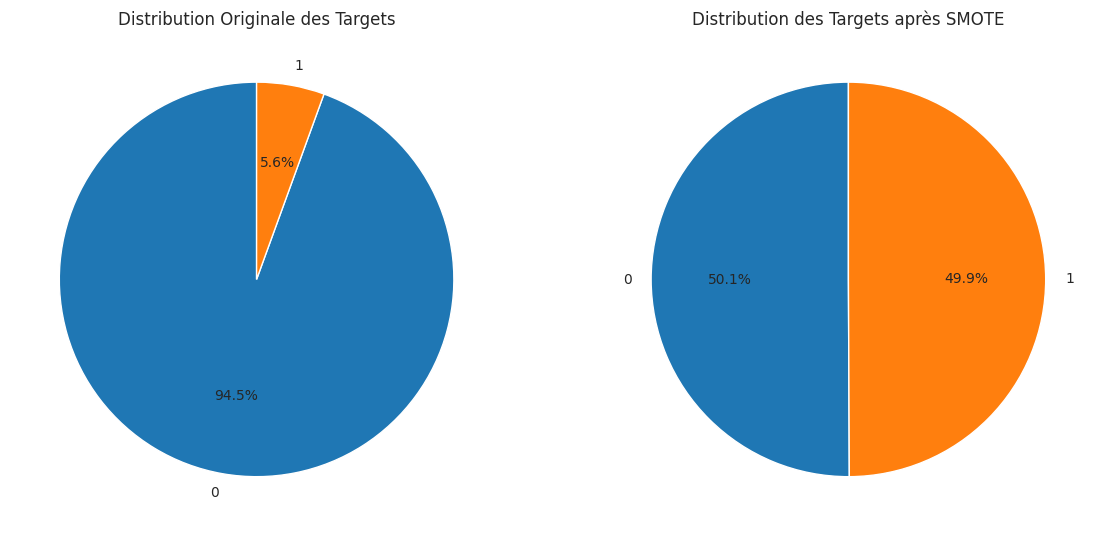

In [35]:
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
resampledData = pd.concat([X_train_resampled, y_train_resampled], axis=1)

plot_target_distribution(y_train, y_train_resampled)     

In [36]:
for model_name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    metrics = evaluate_classification_model(model, X_test, y_test)
    model_name = f"{model_name} avec ADASYN auto"
    print(f"Results for {model_name}: {metrics}")
    new_row = pd.DataFrame([{'Model': model_name, 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
    resultdf = pd.concat([resultdf, new_row], ignore_index=True)


Results for Logistic Regression avec ADASYN auto: {'Accuracy': 0.7772, 'Recall': 0.851063829787234, 'Precision': 0.18292682926829268, 'F1-score': 0.30112923462986196}
Results for Random Forest avec ADASYN auto: {'Accuracy': 0.9858, 'Recall': 0.8439716312056738, 'Precision': 0.8981132075471698, 'F1-score': 0.870201096892139}
Results for SVM avec ADASYN auto: {'Accuracy': 0.9476, 'Recall': 0.851063829787234, 'Precision': 0.5217391304347826, 'F1-score': 0.6469002695417789}
Results for K-Nearest Neighbors avec ADASYN auto: {'Accuracy': 0.9332, 'Recall': 0.8652482269503546, 'Precision': 0.45185185185185184, 'F1-score': 0.5936739659367397}
Results for Naive Bayes avec ADASYN auto: {'Accuracy': 0.7168, 'Recall': 0.8723404255319149, 'Precision': 0.15129151291512916, 'F1-score': 0.2578616352201258}
Results for AdaBoost avec ADASYN auto: {'Accuracy': 0.837, 'Recall': 0.8439716312056738, 'Precision': 0.2358771060455897, 'F1-score': 0.3687064291247095}
Results for CatBoost avec ADASYN auto: {'Accu

In [37]:

mod = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]

voting_classifier = VotingClassifier(estimators=mod, voting='soft', weights=[1, 2])
voting_classifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(voting_classifier, X_test, y_test)
print(f"Results for votingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model':"voting Classifier KNeighbors avec ADASYN auto", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for votingClassifier: {'Accuracy': 0.944, 'Recall': 0.8687943262411347, 'Precision': 0.5020491803278688, 'F1-score': 0.6363636363636365}


In [38]:

mod = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]
stackingClassifier = StackingClassifier(
            estimators=mod,
            final_estimator=KNeighborsClassifier()
        )
stackingClassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(stackingClassifier, X_test, y_test)
print(f"Results for stackingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model':"Stacking Classifier KNeighbors avec ADASYN auto", 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for stackingClassifier: {'Accuracy': 0.9546, 'Recall': 0.851063829787234, 'Precision': 0.5647058823529412, 'F1-score': 0.6789250353606788}


In [39]:
from sklearn.ensemble import BaggingClassifier

base_estimator = RandomForestClassifier(n_estimators=100)

bgclassifier = BaggingClassifier(estimator=base_estimator, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(bgclassifier, X_test, y_test)
print(f"Results for BaggingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model': "Bagging Classifier RandomForest avec ADASYN auto", 'Accuracy': metrics['Accuracy'],'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)


Results for BaggingClassifier: {'Accuracy': 0.8512, 'Recall': 0.8865248226950354, 'Precision': 0.2598752598752599, 'F1-score': 0.40192926045016075}


In [40]:

base_estimator = KNeighborsClassifier()

bgclassifier = BaggingClassifier(estimator=base_estimator, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(bgclassifier, X_test, y_test)
print(f"Results for BaggingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model': "Bagging Classifier KNeighbors avec ADASYN auto", 'Accuracy': metrics['Accuracy'],'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for BaggingClassifier: {'Accuracy': 0.8336, 'Recall': 0.8900709219858156, 'Precision': 0.23859315589353614, 'F1-score': 0.37631184407796103}


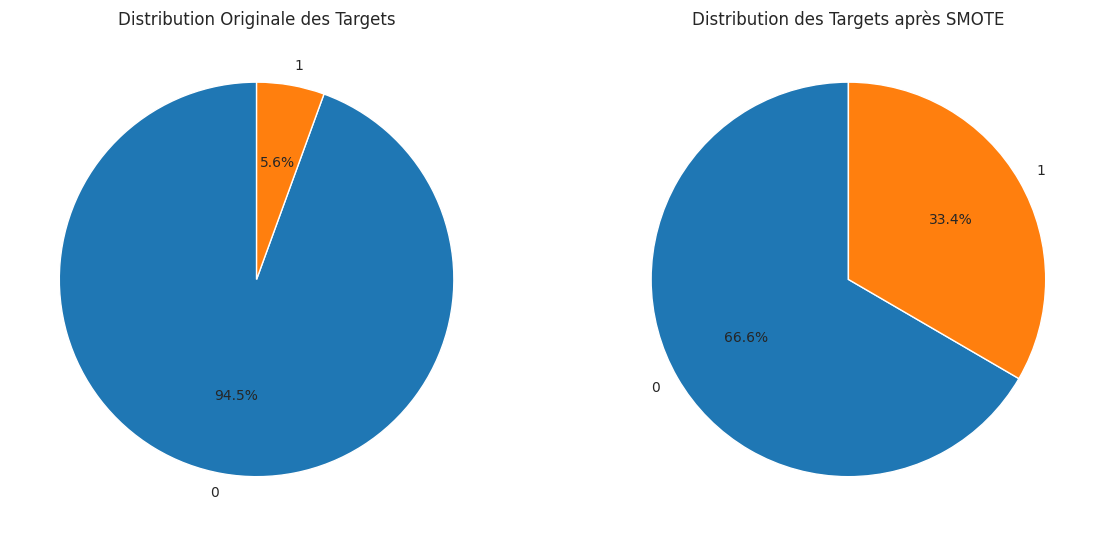

In [41]:
adasyn = ADASYN(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
resampledData = pd.concat([X_train_resampled, y_train_resampled], axis=1)

plot_target_distribution(y_train, y_train_resampled)

In [42]:
for model_name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    metrics = evaluate_classification_model(model, X_test, y_test)
    model_name = f"{model_name} avec ADASYN 0.5"
    print(f"Results for {model_name}: {metrics}")
    new_row = pd.DataFrame([{'Model': model_name, 'Accuracy': metrics['Accuracy'], 'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
    resultdf = pd.concat([resultdf, new_row], ignore_index=True)


Results for Logistic Regression avec ADASYN 0.5: {'Accuracy': 0.907, 'Recall': 0.7659574468085106, 'Precision': 0.35121951219512193, 'F1-score': 0.4816053511705685}
Results for Random Forest avec ADASYN 0.5: {'Accuracy': 0.9876, 'Recall': 0.8404255319148937, 'Precision': 0.9330708661417323, 'F1-score': 0.8843283582089552}
Results for SVM avec ADASYN 0.5: {'Accuracy': 0.9796, 'Recall': 0.8617021276595744, 'Precision': 0.7941176470588235, 'F1-score': 0.8265306122448979}
Results for K-Nearest Neighbors avec ADASYN 0.5: {'Accuracy': 0.945, 'Recall': 0.851063829787234, 'Precision': 0.507399577167019, 'F1-score': 0.6357615894039735}
Results for Naive Bayes avec ADASYN 0.5: {'Accuracy': 0.7764, 'Recall': 0.8652482269503546, 'Precision': 0.18429003021148035, 'F1-score': 0.3038605230386052}
Results for AdaBoost avec ADASYN 0.5: {'Accuracy': 0.919, 'Recall': 0.7872340425531915, 'Precision': 0.3915343915343915, 'F1-score': 0.5229681978798586}
Results for CatBoost avec ADASYN 0.5: {'Accuracy': 0.9

In [43]:

mod = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]

voting_classifier = VotingClassifier(estimators=mod, voting='soft', weights=[1, 2])
voting_classifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(voting_classifier, X_test, y_test)
print(f"Results for votingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model': "Voting Classifier avec ADASYN 0.5", 'Accuracy': metrics['Accuracy'],'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for votingClassifier: {'Accuracy': 0.9584, 'Recall': 0.8581560283687943, 'Precision': 0.5902439024390244, 'F1-score': 0.6994219653179191}


In [44]:
mod = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]
stackingClassifier = StackingClassifier(
            estimators=mod,
            final_estimator=KNeighborsClassifier()
        )
stackingClassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(stackingClassifier, X_test, y_test)
print(f"Results for stackingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model': "Stacking Classifier avec ADASYN 0.5", 'Accuracy': metrics['Accuracy'],'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)


Results for stackingClassifier: {'Accuracy': 0.9644, 'Recall': 0.8404255319148937, 'Precision': 0.6405405405405405, 'F1-score': 0.726993865030675}


In [45]:
base_estimator = RandomForestClassifier(n_estimators=100)

bgclassifier = BaggingClassifier(estimator=base_estimator, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(bgclassifier, X_test, y_test)
print(f"Results for BaggingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model': "Bagging Classifier RandomForest avec ADASYN 0.5", 'Accuracy': metrics['Accuracy'],'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for BaggingClassifier: {'Accuracy': 0.9666, 'Recall': 0.7056737588652482, 'Precision': 0.7031802120141343, 'F1-score': 0.704424778761062}


In [46]:
from sklearn.ensemble import BaggingClassifier

base_estimator = KNeighborsClassifier()

bgclassifier = BaggingClassifier(estimator=base_estimator, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_resampled, y_train_resampled)
metrics = evaluate_classification_model(bgclassifier, X_test, y_test)
print(f"Results for BaggingClassifier: {metrics}")
new_row = pd.DataFrame([{'Model': "Bagging Classifier KNeighbors avec ADASYN 0.5", 'Accuracy': metrics['Accuracy'],'Recall': metrics['Recall'], 'precision': metrics['Precision'], 'F1-score': metrics['F1-score']}])
resultdf = pd.concat([resultdf, new_row], ignore_index=True)

Results for BaggingClassifier: {'Accuracy': 0.9686, 'Recall': 0.7198581560283688, 'Precision': 0.7224199288256228, 'F1-score': 0.7211367673179396}


In [47]:
resultdf.to_csv("resultdf.csv", index=False)

In [48]:
resultdf.shape

(66, 5)

In [49]:
resultdf.sort_values(by='Recall', ascending=False)

,Model,Accuracy,Recall,precision,F1-score
51,Bagging Classifier KNeighbors avec ADASYN auto,0.8336,0.890071,0.238593,0.376312
50,Bagging Classifier RandomForest avec ADASYN auto,0.8512,0.886525,0.259875,0.401929
42,Naive Bayes avec ADASYN auto,0.7168,0.872340,0.151292,0.257862
12,SVM avec SMOTE 0.5,0.9890,0.868794,0.931559,0.899083
48,voting Classifier KNeighbors avec ADASYN auto,0.9440,0.868794,0.502049,0.636364
...,...,...,...,...,...
64,Bagging Classifier RandomForest avec ADASYN 0.5,0.9666,0.705674,0.703180,0.704425
22,Bagging Classifier RandomForest avec SMOTE 0.5,0.9552,0.691489,0.587349,0.635179
23,Bagging Classifier KNeighbors avec SMOTE 0.5,0.9668,0.648936,0.732000,0.687970
5,AdaBoost,0.9710,0.581560,0.858639,0.693446


In [50]:
resultdf.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy,Recall,precision,F1-score
2,SVM,0.9896,0.822695,0.991453,0.899225
6,CatBoost,0.9892,0.822695,0.983051,0.895753
8,LightGBM,0.9892,0.829787,0.975000,0.896552
12,SVM avec SMOTE 0.5,0.9890,0.868794,0.931559,0.899083
19,Extra Trees avec SMOTE 0.5,0.9886,0.822695,0.970711,0.890595
...,...,...,...,...,...
43,AdaBoost avec ADASYN auto,0.8370,0.843972,0.235877,0.368706
51,Bagging Classifier KNeighbors avec ADASYN auto,0.8336,0.890071,0.238593,0.376312
38,Logistic Regression avec ADASYN auto,0.7772,0.851064,0.182927,0.301129
56,Naive Bayes avec ADASYN 0.5,0.7764,0.865248,0.184290,0.303861


In [51]:
resultdf['RecallPlusAccuracy'] = resultdf['Recall'] + resultdf['Accuracy']

resultdf.sort_values(by='RecallPlusAccuracy', ascending=False)

,Model,Accuracy,Recall,precision,F1-score,RecallPlusAccuracy
12,SVM avec SMOTE 0.5,0.9890,0.868794,0.931559,0.899083,1.857794
26,SVM avec SMOTE auto,0.9866,0.865248,0.893773,0.879279,1.851848
54,SVM avec ADASYN 0.5,0.9796,0.861702,0.794118,0.826531,1.841302
30,CatBoost avec SMOTE auto,0.9858,0.854610,0.889299,0.871609,1.840410
16,CatBoost avec SMOTE 0.5,0.9880,0.851064,0.930233,0.888889,1.839064
...,...,...,...,...,...,...
38,Logistic Regression avec ADASYN auto,0.7772,0.851064,0.182927,0.301129,1.628264
23,Bagging Classifier KNeighbors avec SMOTE 0.5,0.9668,0.648936,0.732000,0.687970,1.615736
42,Naive Bayes avec ADASYN auto,0.7168,0.872340,0.151292,0.257862,1.589140
5,AdaBoost,0.9710,0.581560,0.858639,0.693446,1.552560


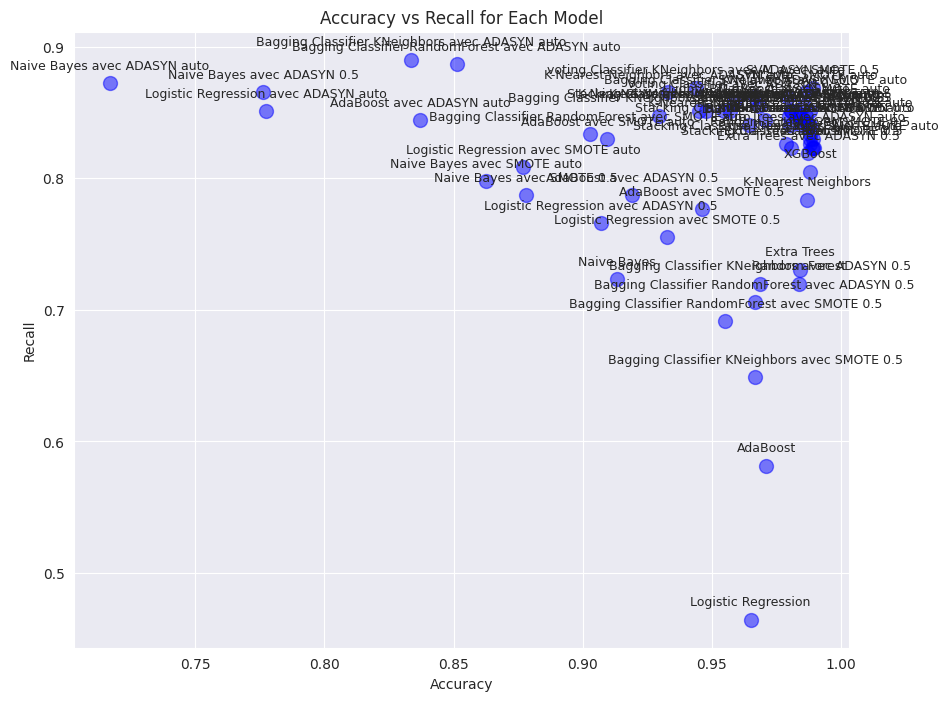

In [52]:
plt.figure(figsize=(10, 8))

plt.scatter(resultdf['Accuracy'], resultdf['Recall'], s=100, alpha=0.5, color='blue')

for i, txt in enumerate(resultdf['Model']):
    plt.annotate(txt, 
                 (resultdf['Accuracy'].iat[i], resultdf['Recall'].iat[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=9)

plt.xlabel('Accuracy')
plt.ylabel('Recall')
plt.title('Accuracy vs Recall for Each Model')
plt.grid(True)

plt.show()

In [53]:
resultdf.sort_values(by='precision', ascending=False)

,Model,Accuracy,Recall,precision,F1-score,RecallPlusAccuracy
2,SVM,0.9896,0.822695,0.991453,0.899225,1.812295
9,Extra Trees,0.9842,0.730496,0.985646,0.839104,1.714696
1,Random Forest,0.9836,0.719858,0.985437,0.831967,1.703458
6,CatBoost,0.9892,0.822695,0.983051,0.895753,1.811895
7,XGBoost,0.9882,0.804965,0.982684,0.884990,1.793165
...,...,...,...,...,...,...
51,Bagging Classifier KNeighbors avec ADASYN auto,0.8336,0.890071,0.238593,0.376312,1.723671
43,AdaBoost avec ADASYN auto,0.8370,0.843972,0.235877,0.368706,1.680972
56,Naive Bayes avec ADASYN 0.5,0.7764,0.865248,0.184290,0.303861,1.641648
38,Logistic Regression avec ADASYN auto,0.7772,0.851064,0.182927,0.301129,1.628264


In [54]:
resultdf.sort_values(by='F1-score', ascending=False)

,Model,Accuracy,Recall,precision,F1-score,RecallPlusAccuracy
2,SVM,0.9896,0.822695,0.991453,0.899225,1.812295
12,SVM avec SMOTE 0.5,0.9890,0.868794,0.931559,0.899083,1.857794
8,LightGBM,0.9892,0.829787,0.975000,0.896552,1.818987
6,CatBoost,0.9892,0.822695,0.983051,0.895753,1.811895
19,Extra Trees avec SMOTE 0.5,0.9886,0.822695,0.970711,0.890595,1.811295
...,...,...,...,...,...,...
51,Bagging Classifier KNeighbors avec ADASYN auto,0.8336,0.890071,0.238593,0.376312,1.723671
43,AdaBoost avec ADASYN auto,0.8370,0.843972,0.235877,0.368706,1.680972
56,Naive Bayes avec ADASYN 0.5,0.7764,0.865248,0.184290,0.303861,1.641648
38,Logistic Regression avec ADASYN auto,0.7772,0.851064,0.182927,0.301129,1.628264


SVM with SMOTE 0.5 seems to be the best model for this dataset because it has the best recall and accuracy (average)

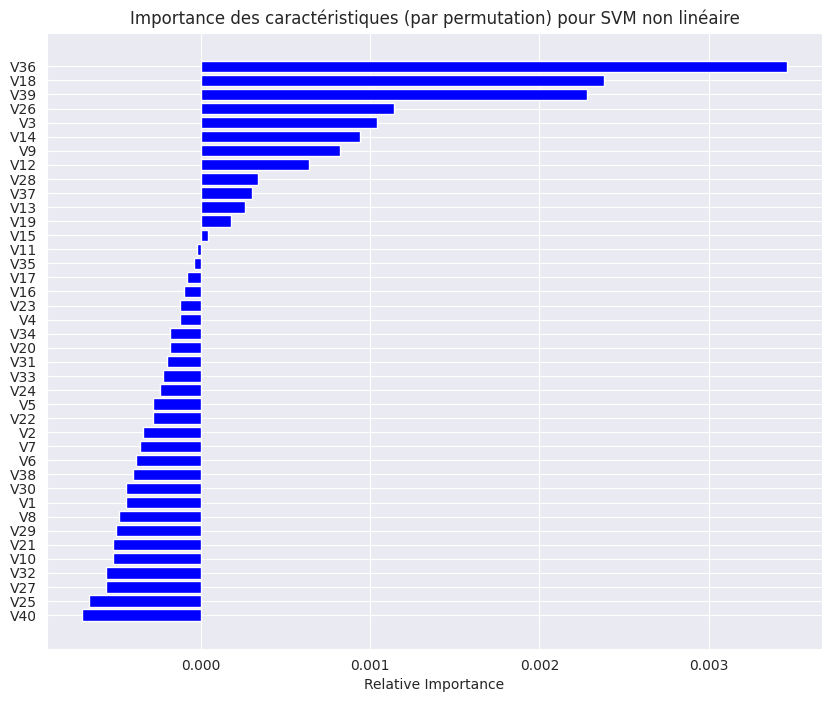

In [55]:
from sklearn.inspection import permutation_importance
def plot_feature_importance(importance, feature_names, title):
    indices = np.argsort(importance)
    
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

feature_names = X_train.columns.tolist()

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
plot_feature_importance(result.importances_mean, feature_names, "Importance des caractéristiques (par permutation) pour SVM non linéaire")

In [56]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
reneData = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [57]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import pandas as pd

search_spaces = {
    'base_estimator__num_leaves': Integer(10, 100),
    'base_estimator__learning_rate': Real(0.01, 0.3),
    'base_estimator__n_estimators': Integer(10, 100),
    'base_estimator__max_depth': Integer(3, 10),
    'n_estimators': Integer(5, 20),
    'max_samples': Real(0.5, 1.0),
    'max_features': Real(0.5, 1.0),
}

lgbm = LGBMClassifier(verbosity=-1)

bagging_model = BaggingClassifier(base_estimator=lgbm, random_state=0)

bayes_search = BayesSearchCV(
    estimator=bagging_model,
    search_spaces=search_spaces,
    scoring='recall',
    n_jobs=-1,
    cv=3,
    n_iter=30,
    random_state=0,
)

bayes_search.fit(X_train_resampled, y_train_resampled)

print("Meilleurs hyperparamètres pour maximiser le recall avec Bagging LightGBM: ", bayes_search.best_params_)
print("Meilleur recall obtenu avec Bagging LightGBM: ", bayes_search.best_score_)

best_params = bayes_search.best_params_
bagging_model.set_params(**best_params)
bagging_model.fit(X_train_resampled, y_train_resampled)

metrics = evaluate_classification_model(bagging_model, X_test, y_test)
print(f"Results for Bagging LightGBM with best params (maximizing recall): {metrics}")

new_row = pd.DataFrame([{'Model': "Bagging LightGBM best params (maximizing recall)", 'Accuracy': metrics['Accuracy'],
                         'Recall': metrics['Recall'], 'Precision': metrics['precision'],
                         'F1-score': metrics['F1-score']}])

resultdf = pd.concat([resultdf, new_row], ignore_index=True)


/home/natflaz/Documents/IUTinfo/s4/data/ReneWind/.venv/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Meilleurs hyperparamètres pour maximiser le recall avec Bagging LightGBM:  OrderedDict([('base_estimator__learning_rate', 0.3), ('base_estimator__max_depth', 10), ('base_estimator__n_estimators', 100), ('base_estimator__num_leaves', 100), ('max_features', 1.0), ('max_samples', 1.0), ('n_estimators', 20)])
Meilleur recall obtenu avec Bagging LightGBM:  0.9715190303315938


/home/natflaz/Documents/IUTinfo/s4/data/ReneWind/.venv/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Results for Bagging LightGBM with best params (maximizing recall): {'Accuracy': 0.9888, 'Recall': 0.8475177304964538, 'Precision': 0.9484126984126984, 'F1-score': 0.895131086142322}


KeyError: 'precision'

In [61]:
resultdf.sort_values(by='Recall', ascending=False)
    

,Model,Accuracy,Recall,precision,F1-score,RecallPlusAccuracy
51,Bagging Classifier KNeighbors avec ADASYN auto,0.8336,0.890071,0.238593,0.376312,1.723671
50,Bagging Classifier RandomForest avec ADASYN auto,0.8512,0.886525,0.259875,0.401929,1.737725
42,Naive Bayes avec ADASYN auto,0.7168,0.872340,0.151292,0.257862,1.589140
12,SVM avec SMOTE 0.5,0.9890,0.868794,0.931559,0.899083,1.857794
48,voting Classifier KNeighbors avec ADASYN auto,0.9440,0.868794,0.502049,0.636364,1.812794
...,...,...,...,...,...,...
64,Bagging Classifier RandomForest avec ADASYN 0.5,0.9666,0.705674,0.703180,0.704425,1.672274
22,Bagging Classifier RandomForest avec SMOTE 0.5,0.9552,0.691489,0.587349,0.635179,1.646689
23,Bagging Classifier KNeighbors avec SMOTE 0.5,0.9668,0.648936,0.732000,0.687970,1.615736
5,AdaBoost,0.9710,0.581560,0.858639,0.693446,1.552560
